In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
pio.renderers.default='plotly_mimetype+notebook_connected'
import warnings
warnings.filterwarnings('ignore')

In [271]:
wb=pd.read_csv("Data/WBnew.csv")
wb.columns.values[-20:]=wb.columns[-20:].str[:-9]
wb=wb.dropna()
def mp(x):
    years=[]
    for i in range (2005, 2025):
        x[str(i)]=pd.to_numeric(x[str(i)], errors='coerce')
        years.append(str(i))
    x=pd.melt(x, id_vars=['Country Name','Series Name'], value_vars=years, var_name='Year', value_name='Value')
    x=x.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
    return x

wb=mp(wb)
wb.head()

Series Name,Country Name,Year,GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Afghanistan,2005,254.184249,0.42,NaN,58.247,250971.0,NaN,NaN,NaN
1,Afghanistan,2006,274.218554,0.42,NaN,58.553,57673.0,10.046897,NaN,NaN
2,Afghanistan,2007,376.223152,0.42,NaN,58.956,-851298.0,-3.585111,NaN,NaN
3,Afghanistan,2008,381.733238,0.42,NaN,59.708,215753.0,12.557960,NaN,NaN
4,Afghanistan,2009,452.053705,0.42,NaN,60.248,-60602.0,17.542929,NaN,NaN


Text(0.5, 1.02, 'Researchers vs GDP per Capita (Regression+CI)')

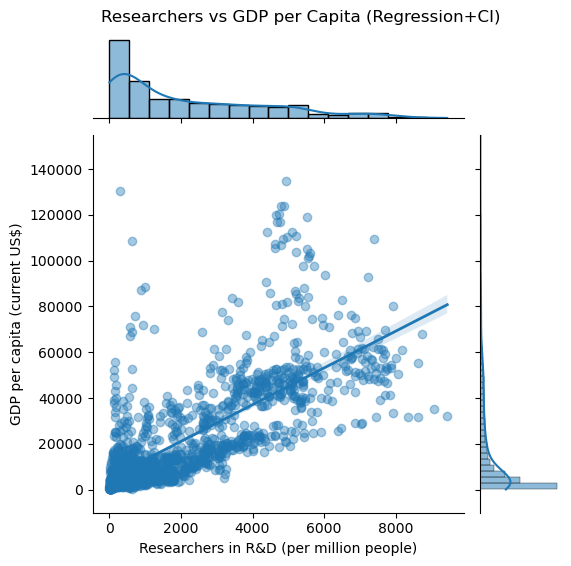

In [272]:
wbk=wb[wb["Country Name"]!="Liechtenstein"]
g = sns.jointplot(
    data=wbk, x="Researchers in R&D (per million people)", y="GDP per capita (current US$)",
    kind="reg", height=5.5, ratio=4, space=0.2,
    joint_kws={"line_kws": {"linewidth":2}, "scatter_kws": {"alpha":0.40}}
)
g.ax_joint.set_ylim(-10000, 155000)
g.fig.suptitle("Researchers vs GDP per Capita (Regression+CI)", y=1.02)

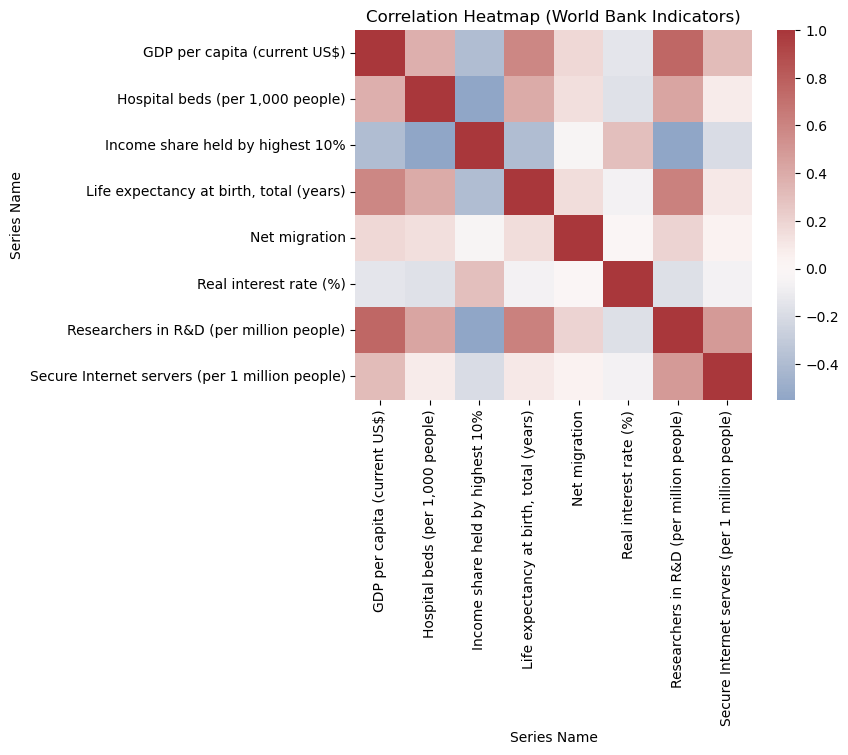

In [273]:
corr=wb.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="vlag", center=0)
plt.title("Correlation Heatmap (World Bank Indicators)")
plt.show()

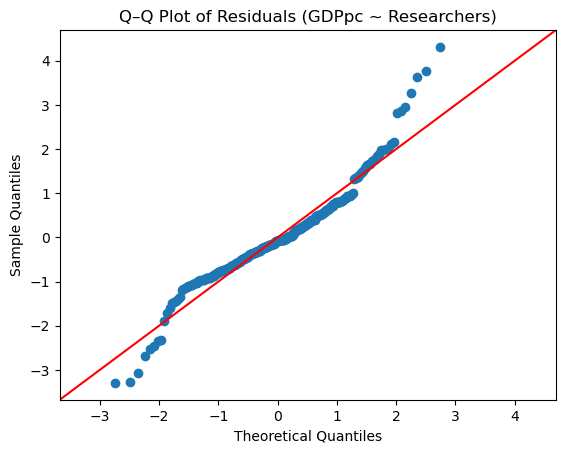

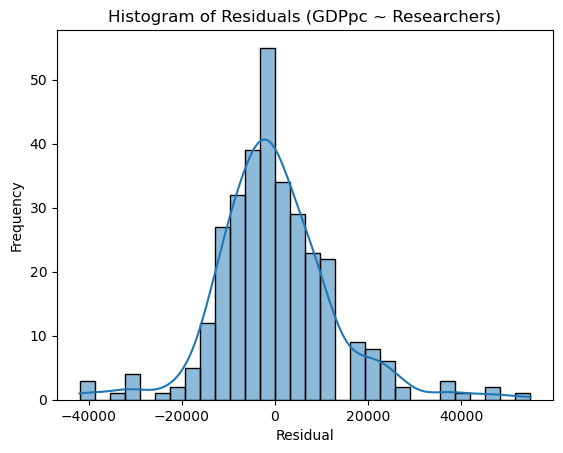

In [274]:
wb=wb.dropna()
X=sm.add_constant(wb["Researchers in R&D (per million people)"])
y=wb["GDP per capita (current US$)"]
model=sm.OLS(y, X).fit()
pred=model.predict(X)
resid=y-pred

sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals (GDPpc ~ Researchers)")
plt.show()

sns.histplot(resid, bins=30, kde=True, edgecolor="black")
plt.title("Histogram of Residuals (GDPpc ~ Researchers)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

### Reflection:
* From the first chart, we can clearly infer that GDP per capita is positively correlated with researchers per capita. This backups up my hypothesis that wealthier nations are able to fund more research.
* The heatmap suggests some of the selected indicators are not correlated, while most others have a slight positive or negative relationship. We can also see that GDP per capita and researchers per million have the highest correlation out of the listed indicators. This also confirms my assumption that there is a positive relationship between research and economic production/output.
* The last two graphs show the distribution of residuals for GDP per capita vs Researchers per million, and from this analysis we can conclude that there is a fairly normal distrubition of datapoints across the countries. Although the spread is not perfect, we only really see deviation from the average variance at the extreme points of the dataset, which make sense as most countries are not able to fund research without stable economics.